**Importing basic libraries**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings("ignore")

**Upload file**

In [13]:
file_path = "/Users/bianca/Documents/U of Chicago/Classes/ADSP 31016 (Leadership & Consulting)/Fitness Club Data V4.xlsx"

**Read data**

In [14]:
df = pd.read_excel(file_path)

**Getting familiar with the dataset**

In [15]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,20190101,1830.2340,210.0000,6.0,CreditCard,1,0,0,0
1,20190101,1296.6660,1296.6660,6.0,Cash,0,0,0,0
2,20190101,930.4428,105.0000,5.0,Cash,0,0,0,0
3,20190102,798.3696,199.5924,9.0,DirectDebit,0,0,1,0
4,20190103,1206.2400,210.0000,9.0,Cheque,0,0,0,0


In [77]:
df.describe()

,enrolldt,price,downpmt,monthdue,use,age,gender,default
count,2.484300e+04,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,2.019814e+07,843.073475,167.852609,8.287290,1.944371,29.203317,0.501993,0.115042
std,6.825852e+03,368.948806,281.767279,7.108381,2.315550,13.277721,0.500006,0.319080
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019082e+07,587.160000,41.160000,5.500000,0.000000,22.000000,0.000000,0.000000
50%,2.020033e+07,839.160000,84.000000,6.000000,1.000000,28.000000,1.000000,0.000000
75%,2.020101e+07,1049.160000,147.000000,9.000000,3.000000,36.000000,1.000000,0.000000
max,2.021033e+07,7871.850000,7871.850000,120.000000,8.000000,99.000000,1.000000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   enrolldt  24843 non-null  int64  
 1   price     24843 non-null  float64
 2   downpmt   24843 non-null  float64
 3   monthdue  24843 non-null  float64
 4   pmttype   24843 non-null  object 
 5   use       24843 non-null  int64  
 6   age       24843 non-null  int64  
 7   gender    24843 non-null  int64  
 8   default   24843 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.7+ MB


<Axes: >

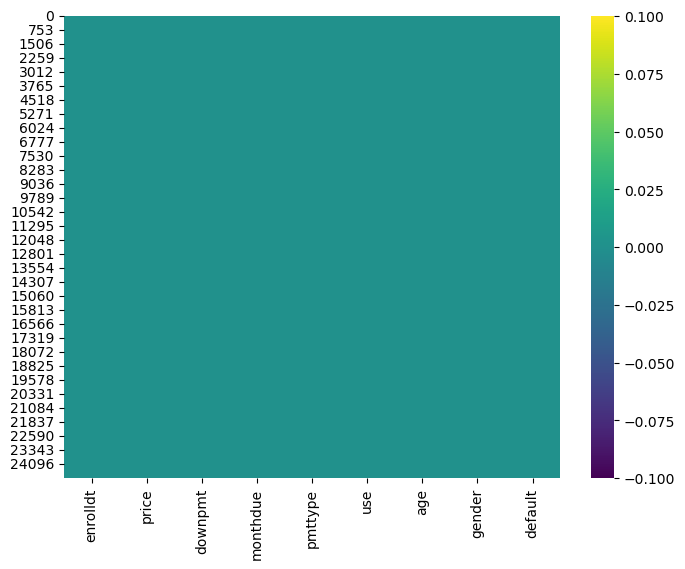

In [79]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='viridis')

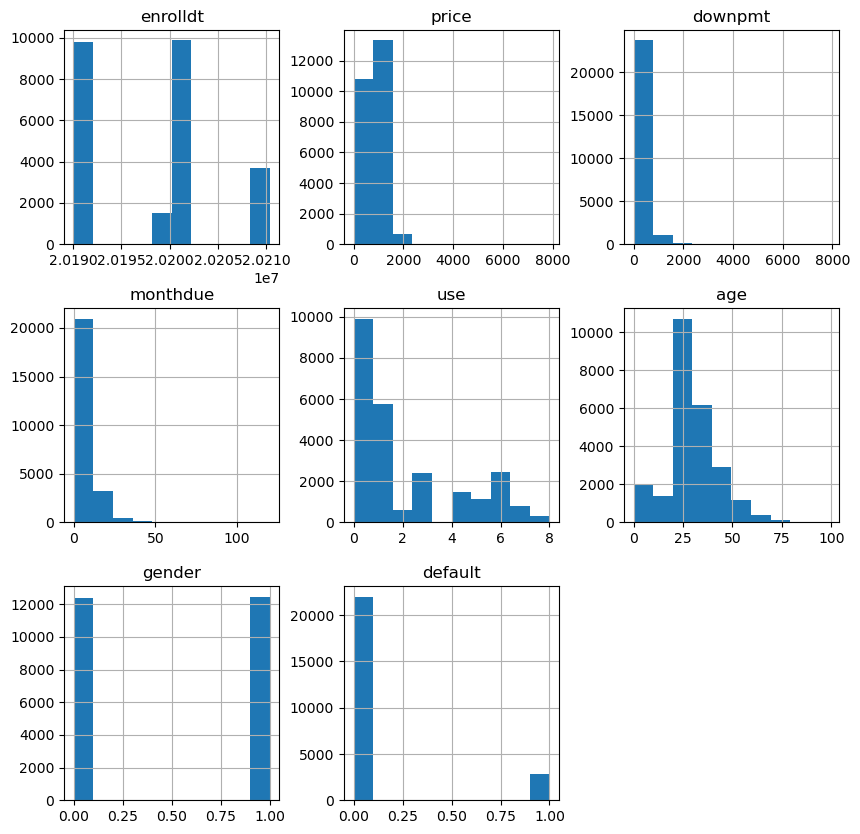

In [80]:
df.hist(figsize=(10,10));

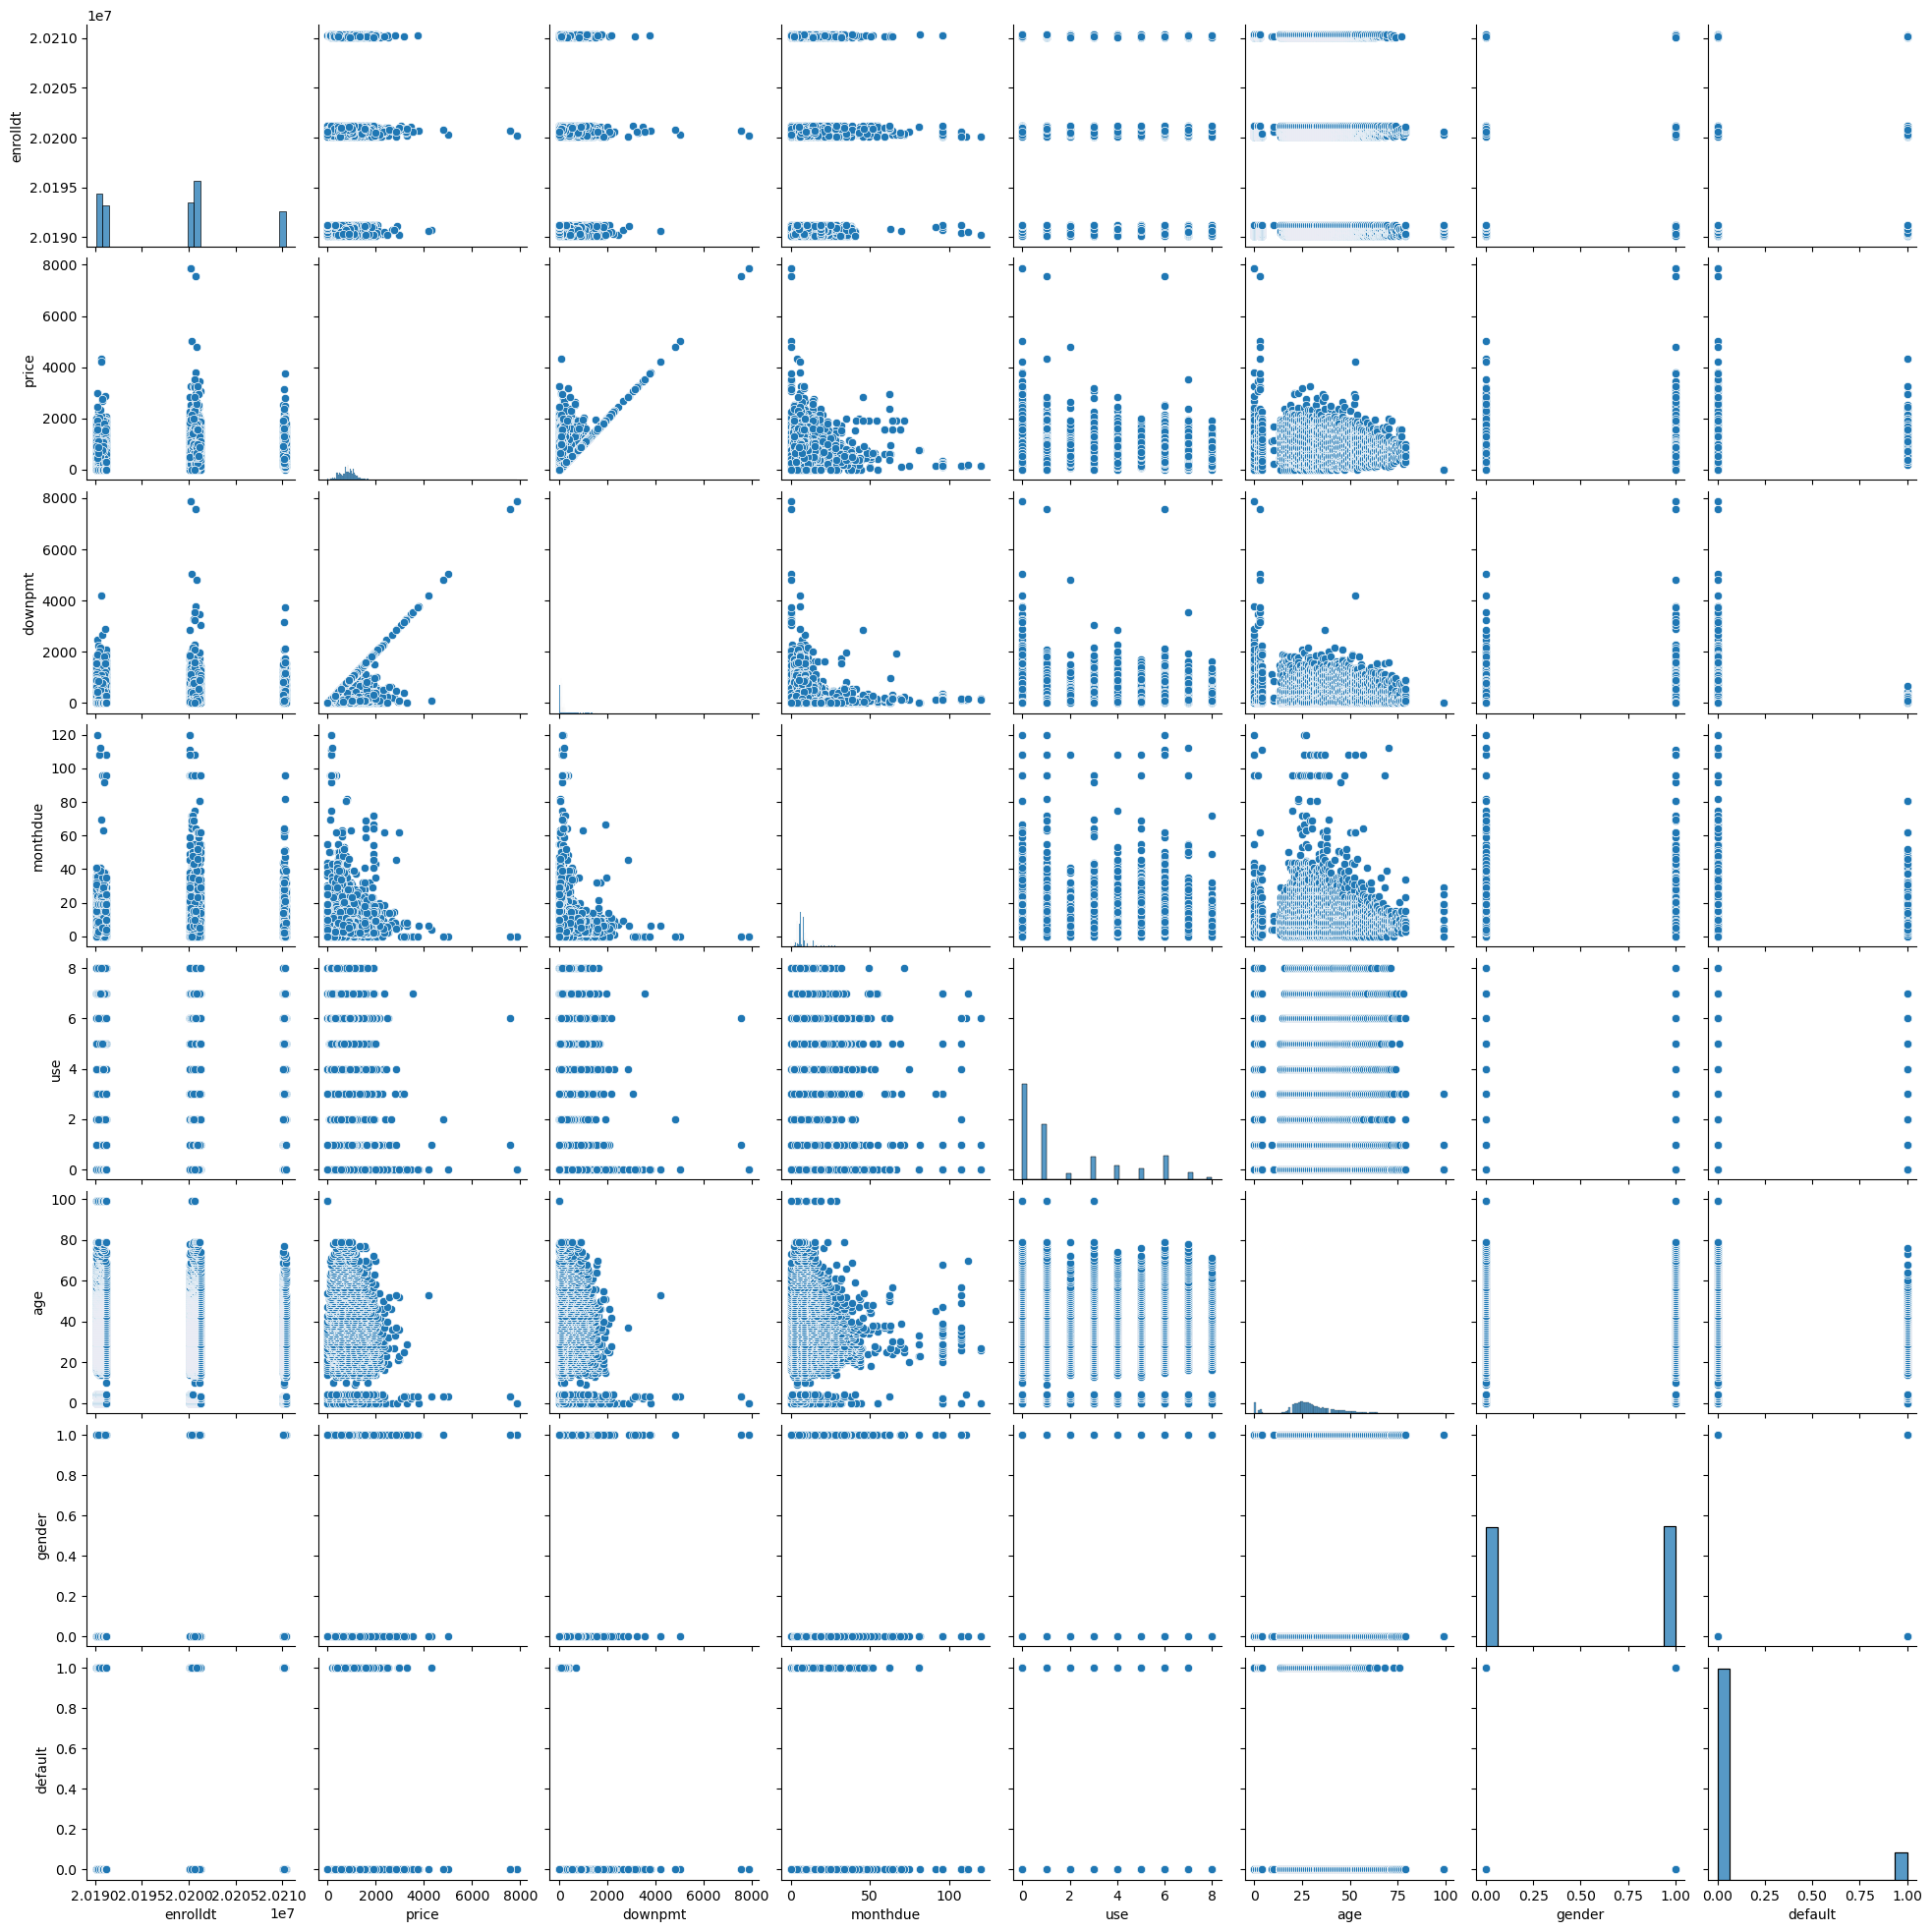

In [81]:
sns.pairplot(df)
plt.show()

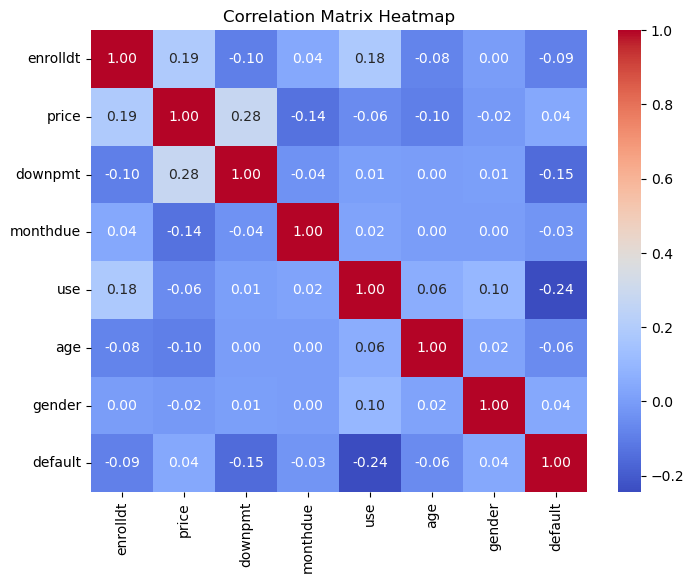

In [82]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [83]:
count_by_category = df['default'].value_counts()
print(count_by_category)

0    21985
1     2858
Name: default, dtype: int64


**Perform logistical regression**

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [87]:
def map_to_numeric(category):
    if category == 'Cash':
        return 1
    elif category == 'CreditCard':
        return 2
    elif category == 'DirectDebit':
        return 3
    elif category == 'Cheque':
        return 4
    else:
        return 0  # Handle other cases if needed

# Use the apply function to apply the custom function to the column
df['pmmttype_numeric'] = df['pmttype'].apply(map_to_numeric)

In [66]:
df['pmttype'] = df['pmttype'].replace(' ', float('nan'))

In [88]:
df.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default,pmmttype_numeric
0,20190101,1830.2340,210.0000,6.0,CreditCard,1,0,0,0,2
1,20190101,1296.6660,1296.6660,6.0,Cash,0,0,0,0,1
2,20190101,930.4428,105.0000,5.0,Cash,0,0,0,0,1
3,20190102,798.3696,199.5924,9.0,DirectDebit,0,0,1,0,3
4,20190103,1206.2400,210.0000,9.0,Cheque,0,0,0,0,4


In [90]:
X = df.drop(columns=['default','pmttype'])
y = df['default']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [95]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix for Logistic Regression Model:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model:\n\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.8929362044676997

Confusion Matrix for Logistic Regression Model:

 [[4324   53]
 [ 479  113]]

Classification Report for Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.90      0.99      0.94      4377
           1       0.68      0.19      0.30       592

    accuracy                           0.89      4969
   macro avg       0.79      0.59      0.62      4969
weighted avg       0.87      0.89      0.87      4969



In [96]:
print("Intercept:", logreg_model.intercept_)
print("Coefficients:", logreg_model.coef_)

Intercept: [-5.02425758e-15]
Coefficients: [[-1.01515812e-07 -3.25734165e-12 -3.31230607e-12 -5.35858291e-14
  -4.22843150e-14 -1.91254547e-13 -1.46296704e-15 -1.94473659e-14]]


**Another way to do logistical regression**

In [97]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.250203
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                24843
Model:                          Logit   Df Residuals:                    24835
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Nov 2023   Pseudo R-squ.:                  0.2990
Time:                        17:11:31   Log-Likelihood:                -6215.8
converged:                       True   LL-Null:                       -8867.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
enrolldt         -8.784e-09    5.1e-09     -1.723      0.085   -1.88e-08    1.21e-09
price      

In [99]:
predicted_probs = result.predict(X)

# Add predicted probabilities to the DataFrame
df['Predicted_Probabilities'] = predicted_probs

# Add a column indicating predicted group based on a threshold (e.g., 0.5)
threshold = 0.5
df['Predicted_Group'] = (df['Predicted_Probabilities'] > threshold).astype(int)

# Display the DataFrame with predictions
predicted_group_1 = df[df['Predicted_Group'] == 1]
print("Rows where Predicted Group is 1:")
print(predicted_group_1)

Rows where Predicted Group is 1:
       enrolldt      price  downpmt  monthdue      pmttype  use  age  gender  \
10     20190108   990.3600    38.64      10.0         Cash    0    0       0   
22     20190128   503.1600    21.84       5.5         Cash    0    0       1   
25     20190201  1116.6204    31.08       5.5  DirectDebit    0    0       1   
34     20190205  1031.5200    25.20       8.5         Cash    0    0       1   
56     20190226  1199.5200    21.00      10.0         Cash    0    0       0   
...         ...        ...      ...       ...          ...  ...  ...     ...   
23941  20191214  1020.9528    36.96       4.0         Cash    0   55       1   
23946  20200102   990.3600     0.00      11.0         Cash    0   55       0   
24051  20200212  1007.1600     4.20       6.0         Cash    0   56       0   
24342  20200412   839.1600     4.20       6.0         Cash    0   60       1   
24777  20200226  1085.2212     4.20       6.0   CreditCard    0   74       1   

      

In [101]:
predicted_classes = (predicted_probs > threshold).astype(int)

accuracy = (predicted_classes == y).mean()

print("Accuracy:", accuracy)

Accuracy: 0.8953427524856097
